<a href="https://colab.research.google.com/github/Farah-Deeba-UNCC/Introduction-to-ML/blob/main/Notebooks/Exercise_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch

In [ ]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [ ]:
def model(t_u, w, b):
    return w * t_u + b

In [ ]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [ ]:
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [ ]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [ ]:
# reuires_grad = True is telling PyTorch to track the entire family tree of tensors resulting from operating on all params involved in the model.
params = torch.tensor([1.0,0.0],requires_grad=True)

# Now we have to call the model and compute the loos and then call 'backward' on the loss tensor.
loss = loss_fn(model(t_u, *params), t_c)
params.grad


In [ ]:
loss.backward()
params.grad

tensor([4517.2969,   82.6000])

In [ ]:
def training_loop(n_epochs, learning_rate, params, t_u,t_c):
  for epoch in range(1,n_epochs+1):
    if params.grad is not None:
      params.grad.zero_()

    t_p = model(t_u, *params)
    loss = loss_fn(t_p,t_c)
    loss.backward()

    with torch.no_grad():
      params -=learning_rate * params.grad

    if epoch % 500 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))
      print(params)
      print(params.grad)
  return params

In [ ]:
training_loop(
    n_epochs = 5000,
    learning_rate = 1e-4,
    params = torch.tensor([1.0,0.0],requires_grad= True),
    t_u = t_u,
    t_c = t_c)
print(params)

Epoch 500, Loss 28.659660
tensor([ 0.2348, -0.1643], requires_grad=True)
tensor([-0.0529,  3.0015])
Epoch 1000, Loss 28.212988
tensor([ 0.2375, -0.3137], requires_grad=True)
tensor([-0.0524,  2.9753])
Epoch 1500, Loss 27.774076
tensor([ 0.2401, -0.4618], requires_grad=True)
tensor([-0.0520,  2.9494])
Epoch 2000, Loss 27.342773
tensor([ 0.2427, -0.6086], requires_grad=True)
tensor([-0.0516,  2.9237])
Epoch 2500, Loss 26.918962
tensor([ 0.2452, -0.7542], requires_grad=True)
tensor([-0.0510,  2.8982])
Epoch 3000, Loss 26.502516
tensor([ 0.2478, -0.8984], requires_grad=True)
tensor([-0.0506,  2.8729])
Epoch 3500, Loss 26.093292
tensor([ 0.2503, -1.0415], requires_grad=True)
tensor([-0.0502,  2.8479])
Epoch 4000, Loss 25.691162
tensor([ 0.2528, -1.1832], requires_grad=True)
tensor([-0.0496,  2.8231])
Epoch 4500, Loss 25.296022
tensor([ 0.2553, -1.3238], requires_grad=True)
tensor([-0.0494,  2.7984])
Epoch 5000, Loss 24.907743
tensor([ 0.2577, -1.4631], requires_grad=True)
tensor([-0.0488,  

In [ ]:
# let's normalize the input
t_un = 0.1*t_u

In [ ]:
def training_loop(n_epochs, learning_rate, params, t_u,t_c):
  for epoch in range(1,n_epochs+1):
    if params.grad is not None:
      params.grad.zero_()

    t_p = model(t_u, *params)
    loss = loss_fn(t_p,t_c)
    loss.backward()

    with torch.no_grad():
      params -=learning_rate * params.grad

    if epoch % 500 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))
      print(params)
      print(params.grad)
  return params

In [ ]:
params = training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0,0.0],requires_grad= True),
    t_u = t_un,
    t_c = t_c)
print(params)

Epoch 500, Loss 7.860115
tensor([ 4.0443, -9.8133], requires_grad=True)
tensor([-0.2252,  1.2748])
Epoch 1000, Loss 3.828538
tensor([  4.8021, -14.1031], requires_grad=True)
tensor([-0.0962,  0.5448])
Epoch 1500, Loss 3.092191
tensor([  5.1260, -15.9365], requires_grad=True)
tensor([-0.0411,  0.2328])
Epoch 2000, Loss 2.957698
tensor([  5.2644, -16.7200], requires_grad=True)
tensor([-0.0176,  0.0995])
Epoch 2500, Loss 2.933134
tensor([  5.3236, -17.0549], requires_grad=True)
tensor([-0.0075,  0.0425])
Epoch 3000, Loss 2.928648
tensor([  5.3489, -17.1980], requires_grad=True)
tensor([-0.0032,  0.0182])
Epoch 3500, Loss 2.927830
tensor([  5.3597, -17.2591], requires_grad=True)
tensor([-0.0014,  0.0078])
Epoch 4000, Loss 2.927679
tensor([  5.3643, -17.2853], requires_grad=True)
tensor([-0.0006,  0.0033])
Epoch 4500, Loss 2.927652
tensor([  5.3662, -17.2964], requires_grad=True)
tensor([-0.0003,  0.0014])
Epoch 5000, Loss 2.927647
tensor([  5.3671, -17.3012], requires_grad=True)
tensor([-9

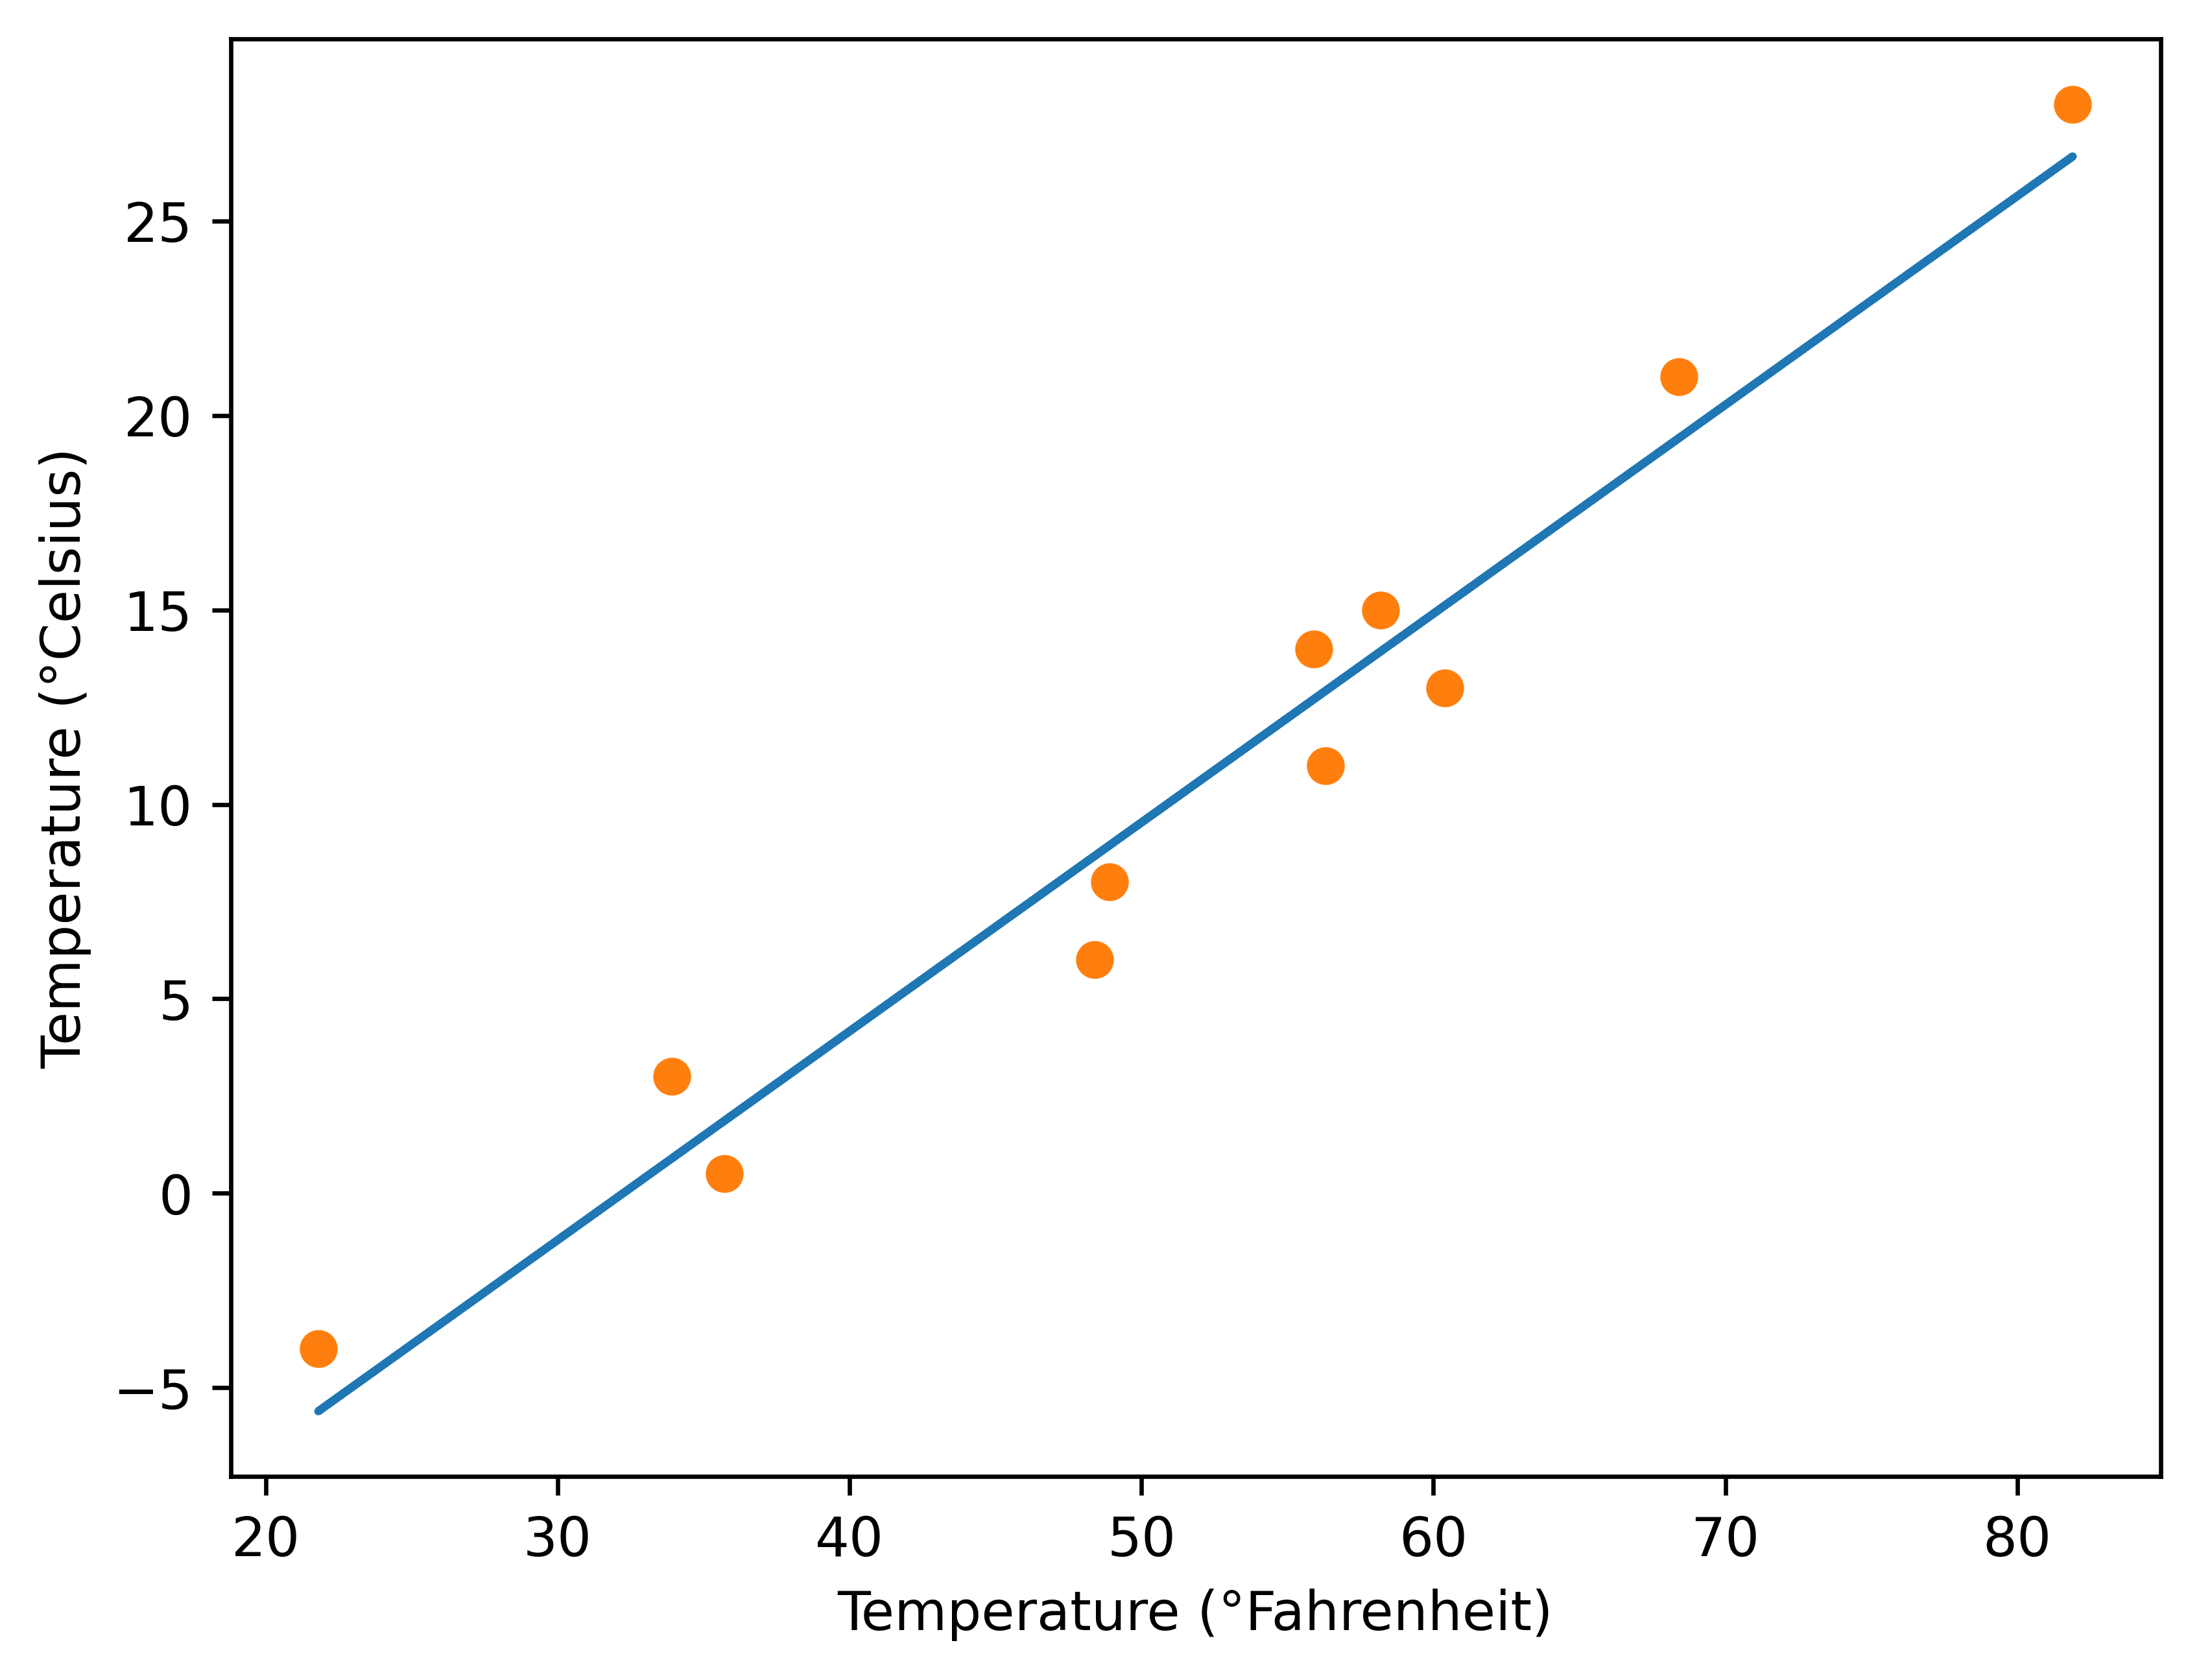

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [ ]:
import torch.optim as optim
params = torch.tensor([1.0,0.0],requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params],lr = learning_rate)

In [ ]:
t_p = model(t_u,*params)
loss = loss_fn(t_p,t_c)
loss.backward()
optimizer.step()
params


tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

In [ ]:
def training_loop(n_epochs, optimizer, params, t_u,t_c):
  for epoch in range(1,n_epochs+1):
    t_p = model(t_u, *params)
    loss = loss_fn(t_p,t_c)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



    if epoch % 500 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))
      print(params)
      print(params.grad)
  return params

In [ ]:
params = torch.tensor([1.0,0.0],requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params],lr = learning_rate)
training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)
print(params)

params

Epoch 500, Loss 7.860120
tensor([ 4.0443, -9.8133], requires_grad=True)
tensor([-0.2252,  1.2748])
Epoch 1000, Loss 3.828538
tensor([  4.8021, -14.1031], requires_grad=True)
tensor([-0.0962,  0.5448])
Epoch 1500, Loss 3.092191
tensor([  5.1260, -15.9365], requires_grad=True)
tensor([-0.0411,  0.2328])
Epoch 2000, Loss 2.957698
tensor([  5.2644, -16.7200], requires_grad=True)
tensor([-0.0176,  0.0995])
Epoch 2500, Loss 2.933134
tensor([  5.3236, -17.0549], requires_grad=True)
tensor([-0.0075,  0.0425])
Epoch 3000, Loss 2.928648
tensor([  5.3489, -17.1980], requires_grad=True)
tensor([-0.0032,  0.0182])
Epoch 3500, Loss 2.927830
tensor([  5.3597, -17.2591], requires_grad=True)
tensor([-0.0014,  0.0078])
Epoch 4000, Loss 2.927679
tensor([  5.3643, -17.2853], requires_grad=True)
tensor([-0.0006,  0.0033])
Epoch 4500, Loss 2.927652
tensor([  5.3662, -17.2964], requires_grad=True)
tensor([-0.0003,  0.0014])
Epoch 5000, Loss 2.927647
tensor([  5.3671, -17.3012], requires_grad=True)
tensor([-9

tensor([  5.3671, -17.3012], requires_grad=True)

## Training and Validation in PyTorch

In [ ]:
# splitting a dataset
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_indices, val_indices

(tensor([ 6,  5,  8,  7, 10,  1,  4,  3,  0]), tensor([2, 9]))

In [ ]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

In [ ]:
# crude normalization
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [ ]:
def training_loop(n_epochs, optimizer, params, train_t_u,val_t_u, train_t_c,val_t_c):
  for epoch in range(1,n_epochs+1):
    train_t_p = model(train_t_u, *params)
    train_loss = loss_fn(train_t_p, train_t_c)

    val_t_p = model(val_t_u, *params)
    val_loss = loss_fn(val_t_p, val_t_c)


    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()



    if epoch<= 3 or epoch % 500 == 0:
      print('Epoch %d, Training Loss %f, Validation Loss %f' % (epoch, float(train_loss), float(val_loss)))
      print(params)
      print(params.grad)
  return params

In [ ]:
params = torch.tensor([1.0,0.0],requires_grad = True)
learning_rate = 1e-2
optimizer = optim.SGD([params],lr = learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 1, Training Loss 83.477081, Validation Loss 66.357002
tensor([1.7365, 0.0942], requires_grad=True)
tensor([-73.6469,  -9.4178])
Epoch 2, Training Loss 44.310902, Validation Loss 14.440202
tensor([2.0492, 0.1126], requires_grad=True)
tensor([-31.2748,  -1.8451])
Epoch 3, Training Loss 37.304970, Validation Loss 4.513642
tensor([2.1842, 0.0994], requires_grad=True)
tensor([-13.4971,   1.3276])
Epoch 500, Training Loss 7.161754, Validation Loss 2.258257
tensor([  4.2911, -11.1421], requires_grad=True)
tensor([-0.2326,  1.2998])
Epoch 1000, Training Loss 3.470466, Validation Loss 2.710732
tensor([  5.0156, -15.1916], requires_grad=True)
tensor([-0.0828,  0.4631])
Epoch 1500, Training Loss 3.002004, Validation Loss 2.904496
tensor([  5.2737, -16.6342], requires_grad=True)
tensor([-0.0295,  0.1650])
Epoch 2000, Training Loss 2.942551, Validation Loss 2.977657
tensor([  5.3656, -17.1481], requires_grad=True)
tensor([-0.0105,  0.0588])
Epoch 2500, Training Loss 2.935005, Validation Loss 

tensor([  5.4164, -17.4319], requires_grad=True)

In [ ]:
def training_loop(n_epochs, optimizer, params, train_t_u,val_t_u, train_t_c,val_t_c):
  for epoch in range(1,n_epochs+1):
    train_t_p = model(train_t_u, *params)
    train_loss = loss_fn(train_t_p, train_t_c)
    with torch.no_grad():
      val_t_p = model(val_t_u, *params)
      val_loss = loss_fn(val_t_p, val_t_c)
      assert val_loss.requires_grad == False


    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()



    if epoch<= 3 or epoch % 500 == 0:
      print('Epoch %d, Training Loss %f, Validation Loss %f' % (epoch, float(train_loss), float(val_loss)))
      print(params)
      print(params.grad)
  return params